In [1]:
from pybaseball import statcast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Import all the data from the first half of the season. 

In [2]:
data_2017 = statcast('2017-04-02', '2017-10-1')
print(data_2017.shape)

This is a large query, it may take a moment to complete
Completed sub-query from 2017-04-02 to 2017-04-07
Completed sub-query from 2017-04-08 to 2017-04-13
Completed sub-query from 2017-04-14 to 2017-04-19
Completed sub-query from 2017-04-20 to 2017-04-25
Completed sub-query from 2017-04-26 to 2017-05-01
Completed sub-query from 2017-05-02 to 2017-05-07
Completed sub-query from 2017-05-08 to 2017-05-13
Completed sub-query from 2017-05-14 to 2017-05-19
Completed sub-query from 2017-05-20 to 2017-05-25
Completed sub-query from 2017-05-26 to 2017-05-31
Completed sub-query from 2017-06-01 to 2017-06-06
Completed sub-query from 2017-06-07 to 2017-06-12
Completed sub-query from 2017-06-13 to 2017-06-18
Completed sub-query from 2017-06-19 to 2017-06-24
Completed sub-query from 2017-06-25 to 2017-06-30
Completed sub-query from 2017-07-01 to 2017-07-06
Completed sub-query from 2017-07-07 to 2017-07-12
Completed sub-query from 2017-07-13 to 2017-07-18
Completed sub-query from 2017-07-19 to 2017-

In [118]:
full_data = data_2017.dropna(subset=['launch_angle', 'launch_speed', 'launch_speed_angle'])
print(full_data.shape)
data = full_data.dropna(how="all",axis="columns")


data_w_stringers = data.copy()


(127550, 90)


Statcast data started implementing a No Nulls strategy outlined here: https://baseballwithr.wordpress.com/2019/06/25/cleaning-statcast-data/amp/?__twitter_impression=true

We need to check the distribution of our launch speed and launch angles. 

Other articles discussing imputed data:
http://tangotiger.com/index.php/site/comments/statcast-lab-no-nulls-in-batted-balls-launch-parameters
https://tht.fangraphs.com/43416-2/


Text(0.5, 1.0, 'Distribution of launch speeds')

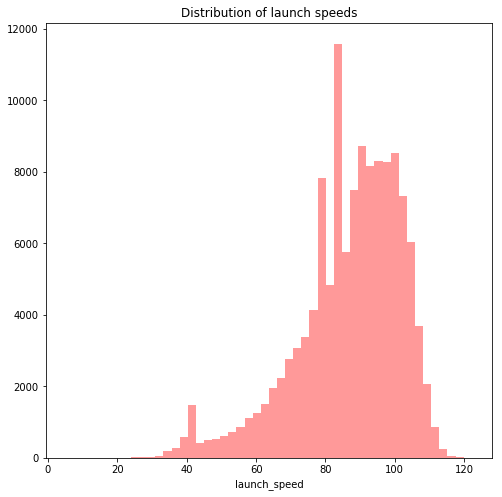

In [119]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.distplot(data['launch_speed'],color='red',hist=True, kde=False)
ax.set_title("Distribution of launch speeds")


Text(0.5, 1.0, 'Distribution of launch angles')

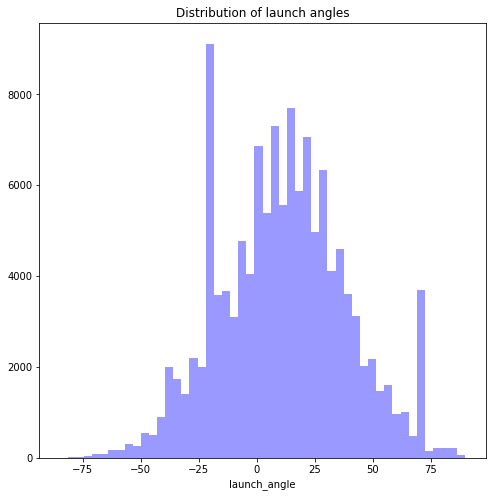

In [120]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.distplot(data['launch_angle'],color='blue',hist=True, kde=False)
ax.set_title("Distribution of launch angles")

The launch angles of ~ -38, ~-17, and ~15 degrees all look a little high. Using the Stringer Definitions by Andrew  Perpetua (Hardball Times Article), we should remove the samples where the launch angle is equal to the exit velocity.

For consistency, I will be using all the Stringer Labels

In [121]:
data['launch_angle'].nunique()

176

In [122]:
deleted_groundball_stringers = 0

#ground ball stringers
stringer = data[ (data['launch_speed'] == 90) & (data['launch_angle'] == -13.0) ].index
deleted_groundball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 90.2) & (data['launch_angle'] == -13.0) ].index
deleted_groundball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 93.0) & (data['launch_angle'] == -1) ].index
deleted_groundball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 43) & (data['launch_angle'] == -62) ].index
deleted_groundball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 84) & (data['launch_angle'] == -20) ].index
deleted_groundball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 86) & (data['launch_angle'] == -11) ].index
deleted_groundball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 40) & (data['launch_angle'] == -36) ].index
deleted_groundball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 90) & (data['launch_angle'] == -17) ].index
deleted_groundball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 90.3) & (data['launch_angle'] == -17.3) ].index
deleted_groundball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 93) & (data['launch_angle'] == -3) ].index
deleted_groundball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 94) & (data['launch_angle'] == -12) ].index
deleted_groundball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 94.3) & (data['launch_angle'] == -12.1) ].index
deleted_groundball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 41) & (data['launch_angle'] == -39) ].index
deleted_groundball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 82.9) & (data['launch_angle'] == -20.699) ].index
deleted_groundball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 83) & (data['launch_angle'] == -21) ].index
deleted_groundball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 84) & (data['launch_angle'] == -13) ].index
deleted_groundball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

print("deleted %d groundball stringers" %deleted_groundball_stringers)

deleting 13 stringers
deleting 96 stringers
deleting 4 stringers
deleting 14 stringers
deleting 9 stringers
deleting 4 stringers
deleting 292 stringers
deleting 70 stringers
deleting 0 stringers
deleting 18 stringers
deleting 6 stringers
deleting 0 stringers
deleting 1132 stringers
deleting 0 stringers
deleting 236 stringers
deleting 62 stringers
deleted 1956 groundball stringers


In [123]:
deleted_linedrive_stringers = 0 

stringer = data[ (data['launch_speed'] == 98.8) & (data['launch_angle'] == 17.1) ].index
deleted_linedrive_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 99) & (data['launch_angle'] == 17) ].index
deleted_linedrive_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 104) & (data['launch_angle'] == 24) ].index
deleted_linedrive_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 104.4) & (data['launch_angle'] == 23.699) ].index
deleted_linedrive_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 41) & (data['launch_angle'] == 16) ].index
deleted_linedrive_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 90) & (data['launch_angle'] == 15) ].index
deleted_linedrive_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 90.4) & (data['launch_angle'] == 14.6) ].index
deleted_linedrive_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 98.4) & (data['launch_angle'] == 18) ].index
deleted_linedrive_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 99) & (data['launch_angle'] == 18) ].index
deleted_linedrive_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 37) & (data['launch_angle'] == 13) ].index
deleted_linedrive_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 91) & (data['launch_angle'] == 18) ].index
deleted_linedrive_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 91.1) & (data['launch_angle'] == 18.199) ].index
deleted_linedrive_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

print("deleted %d linedrive stringers" %deleted_linedrive_stringers)

deleting 0 stringers
deleting 36 stringers
deleting 10 stringers
deleting 0 stringers
deleting 0 stringers
deleting 81 stringers
deleting 0 stringers
deleting 17 stringers
deleting 11 stringers
deleting 0 stringers
deleting 90 stringers
deleting 0 stringers
deleted 245 linedrive stringers


In [124]:
deleted_flyball_stringers = 0

stringer = data[ (data['launch_speed'] == 103) & (data['launch_angle'] == 30) ].index
deleted_flyball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 102.8) & (data['launch_angle'] == 30.199) ].index
deleted_flyball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 97) & (data['launch_angle'] == 31) ].index
deleted_flyball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 95) & (data['launch_angle'] == 29) ].index
deleted_flyball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 93.1) & (data['launch_angle'] == 32) ].index
deleted_flyball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 93) & (data['launch_angle'] == 32) ].index
deleted_flyball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 89.2) & (data['launch_angle'] == 32.299) ].index
deleted_flyball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 89) & (data['launch_angle'] == 38) ].index
deleted_flyball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 89) & (data['launch_angle'] == 39) ].index
deleted_flyball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 73) & (data['launch_angle'] == 34) ].index
deleted_flyball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 71.4) & (data['launch_angle'] == 36) ].index
deleted_flyball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 71) & (data['launch_angle'] == 36) ].index
deleted_flyball_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

print("deleted %d flyball stringers" %deleted_flyball_stringers)

deleting 41 stringers
deleting 0 stringers
deleting 8 stringers
deleting 7 stringers
deleting 37 stringers
deleting 8 stringers
deleting 0 stringers
deleting 16 stringers
deleting 156 stringers
deleting 3 stringers
deleting 19 stringers
deleting 4 stringers
deleted 299 flyball stringers


In [125]:
deleted_popup_stringers = 0

stringer = data[ (data['launch_speed'] == 37) & (data['launch_angle'] == 62) ].index
deleted_popup_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 75) & (data['launch_angle'] == 60) ].index
deleted_popup_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 80) & (data['launch_angle'] == 69) ].index
deleted_popup_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 89) & (data['launch_angle'] == 63) ].index
deleted_popup_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 81) & (data['launch_angle'] == 65) ].index
deleted_popup_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

stringer = data[ (data['launch_speed'] == 86) & (data['launch_angle'] == 67) ].index
deleted_popup_stringers += len(stringer)
print("deleting %d stringers" %len(stringer))
data.drop(stringer, axis=0,inplace=True)

print("deleted %d popup stringers" %deleted_popup_stringers)

deleting 1 stringers
deleting 10 stringers
deleting 3421 stringers
deleting 2 stringers
deleting 12 stringers
deleting 17 stringers
deleted 3463 popup stringers


In [126]:
sum_deleted = deleted_groundball_stringers + deleted_linedrive_stringers + deleted_flyball_stringers + deleted_popup_stringers

print("deleted %d total stringers" % sum_deleted)

deleted 5963 total stringers


Replotting distributions

Text(0.5, 1.0, 'Distribution of launch speeds')

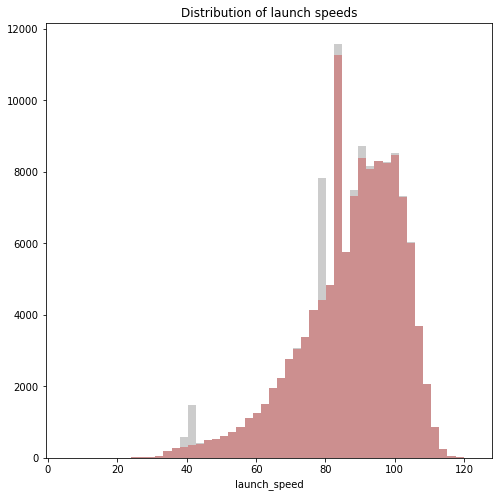

In [127]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.distplot(data['launch_speed'],color='red',hist=True, kde=False)
sns.distplot(data_w_stringers['launch_speed'], color='grey', hist=True, kde=False)
ax.set_title("Distribution of launch speeds")

Text(0.5, 1.0, 'Distribution of launch angles')

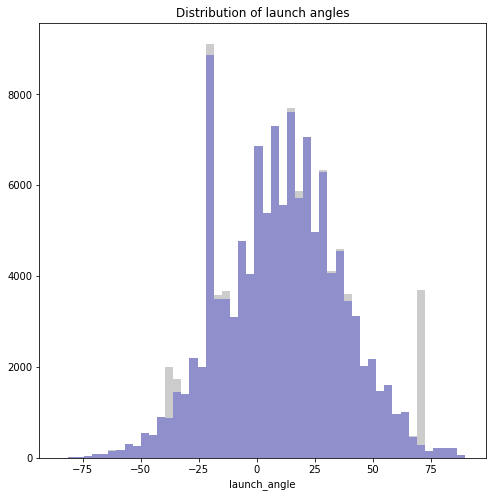

In [128]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.distplot(data['launch_angle'],color='blue',hist=True, kde=False)
sns.distplot(data_w_stringers['launch_angle'], color='grey', hist=True, kde=False)
ax.set_title("Distribution of launch angles")

Text(0.5, 1.0, 'WOBA by Launch Angle and Exit Velocity')

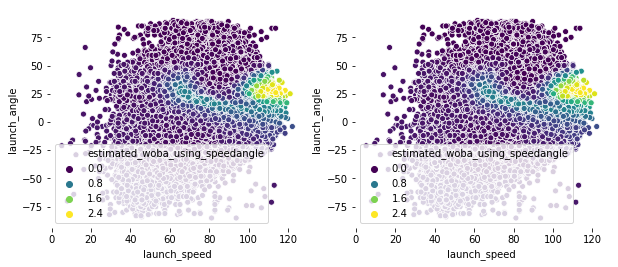

In [129]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 4))
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(x="launch_speed", y="launch_angle",
                hue="estimated_woba_using_speedangle", 
                palette='viridis', 
                data=data, ax=ax1)
sns.scatterplot(x="launch_speed", y="launch_angle",
                hue="estimated_woba_using_speedangle", 
                palette='viridis', 
                data=data_w_stringers, ax=ax2)
ax.set_title("WOBA by Launch Angle and Exit Velocity")

As we can see, the place where WOBA is highest is along the same area where home runs are hit. This makes sense. 

Text(0.5, 1.0, 'Home Runs by Launch Angle and Exit Velocity')

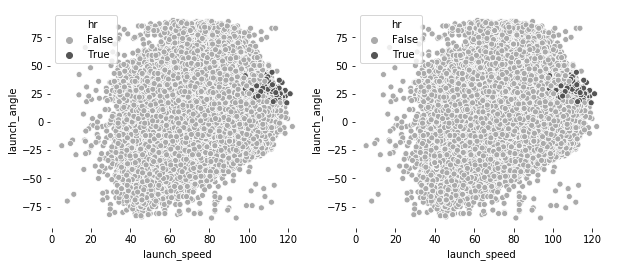

In [130]:
data['hr'] = data.events=='home_run'
data_w_stringers['hr'] = data_w_stringers.events =='home_run'

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 4))
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(x="launch_speed", y="launch_angle",
                hue="hr", 
                palette='binary', 
                data=data, ax=ax1)
sns.scatterplot(x="launch_speed", y="launch_angle",
        hue="hr", 
        palette='binary', 
        data=data_w_stringers, ax=ax2)
ax.set_title("Home Runs by Launch Angle and Exit Velocity")

In [131]:
hit_conditions = [data.events =='single',data.events =='double',data.events =='triple', data.events =='home_run']
hit_choicelist = ['hit', 'hit', 'hit', 'hit']
data['hits'] = np.select(hit_conditions,hit_choicelist, default='out')
data['hits'].describe()

hit_conditions = [data_w_stringers.events =='single',data_w_stringers.events =='double',data_w_stringers.events =='triple', data_w_stringers.events =='home_run']
data_w_stringers['hits'] = np.select(hit_conditions,hit_choicelist, default='outs')
data_w_stringers['hits'].describe()

count     127550
unique         2
top         outs
freq       85340
Name: hits, dtype: object

Text(0.5, 1.0, 'Hits with Outs by Launch Angle and Exit Velocity')

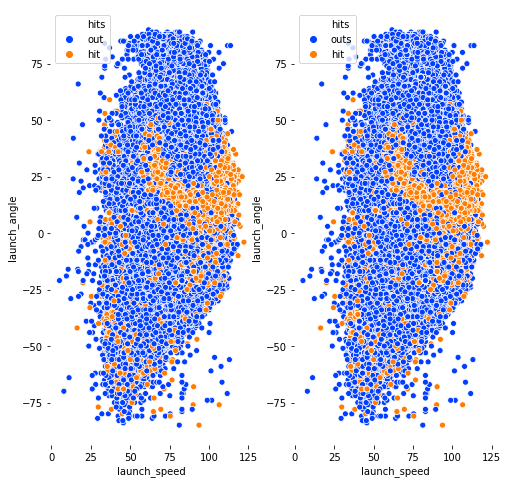

In [132]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(8, 8))
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(x="launch_speed", y="launch_angle",
                hue="hits", 
                palette='bright', 
                data=data, ax=ax1)
sns.scatterplot(x="launch_speed", y="launch_angle",
                hue="hits", 
                palette='bright', 
                data=data_w_stringers, ax=ax2)
ax.set_title("Hits with Outs by Launch Angle and Exit Velocity")

Look at number of hits per zone bin? 

As we can see from the graphs, the removed stringers only seem to 
affect a couple buckets on the distributions, but the graphs between 
launch angle, launch speed, hits, are practically the same



In [104]:
from sklearn.preprocessing import label_binarize

y = label_binarize(data['hits'],classes=['out','hit'])
data = data.drop(['hits'], axis=1)

print(y)



[[0]
 [0]
 [0]
 ..., 
 [0]
 [1]
 [1]]


In [105]:
x = data[['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_y',
       'release_pos_z', 'zone','launch_speed', 'launch_angle',
          'effective_speed', 'release_spin_rate', 'release_extension']]
print(x.shape)

(121587, 11)


In [106]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=.7)


In [107]:
cat_columns = [col for col in x_train if x_train[col].dtype == object]
numerical_columns = [col for col in x_train if x_train[col].dtype != object]
print(numerical_columns)
print(cat_columns)

['release_speed', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'zone', 'launch_speed', 'launch_angle', 'effective_speed', 'release_spin_rate', 'release_extension']
['pitch_type']


In [108]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse="False"))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, cat_columns)
])


In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def get_score(n_estimators, preprocessor):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    # Replace this body with your own code
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    scores = -1 * cross_val_score(pipeline, x_train, y_train,
                              cv=3,
                              scoring='neg_mean_absolute_error')
    print(scores)
    return scores.mean()

In [110]:
results = {}
for i in range(1,9):
    results[50*i] = get_score(50*i, preprocessor)

[ 0.20521678  0.20863588  0.21099753]
[ 0.2023969   0.20285513  0.20853014]
[ 0.20158618  0.20144519  0.2070497 ]
[ 0.20151569  0.19985901  0.2069792 ]
[ 0.20179767  0.19915404  0.20669722]
[ 0.20133944  0.19943602  0.20669722]
[ 0.20200916  0.20035249  0.20571026]
[ 0.2012337   0.20014099  0.20571026]


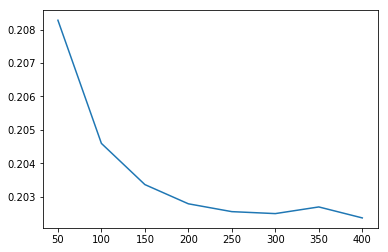

In [111]:
plt.plot(results.keys(), results.values())

As we can see, the mean square error plateaus around the 200 range at the time of running. We gain less than a percent of precision as we increase estimators and actually lose precision with 350 estimators

In [114]:
from sklearn.metrics import classification_report, 
model = RandomForestClassifier(n_estimators=200, random_state=0)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

pipeline.fit(x_train,y_train)

predictions = pipeline.predict(x_test)
print(classification_report(y_test, predictions, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     24051
           1       0.73      0.66      0.69     12426

   micro avg       0.80      0.80      0.80     36477
   macro avg       0.78      0.77      0.77     36477
weighted avg       0.80      0.80      0.80     36477



In [115]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,predictions))

0.801765496066


So, as we can tell, we predict outs better than hits. 

This idea was based on this fangraphs article: https://tht.fangraphs.com/using-statcast-data-to-predict-hits/

For reference 

Precision: 73%
Recall: 66%
Specificity: 83%
Overall Accuracy: 80 %

In [157]:
predicted_full_data = x_test.copy()
predicted_full_data['hits'] = ['hit'if pred == 1 else 'out' for pred in predictions]

true_full_data = x_test.copy()
true_full_data['hits'] = ['hit'if real == 1 else 'out' for real in y_test]

print(type(predicted_full_data))

<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1.0, 'Predicted Hit/Out based on Launch Angle and Exit Velocity')

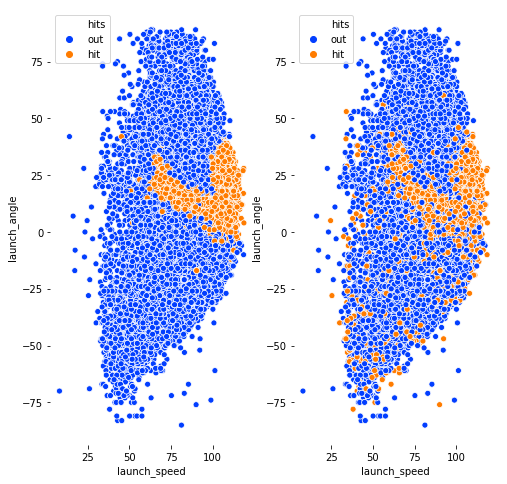

In [158]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8, 8))

sns.despine(fig, left=True, bottom=True)
sns.scatterplot(x="launch_speed", y="launch_angle",
                hue="hits", 
                palette='bright', 
                data=predicted_full_data, ax=ax1)
ax.set_title("Predicted Hit/Out based on Launch Angle and Exit Velocity")
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(x="launch_speed", y="launch_angle",
                hue="hits", 
                palette='bright', 
                data=true_full_data, ax=ax2)
ax.set_title("Predicted Hit/Out vs Real Hit/Out based on Launch Angle and Exit Velocity")

From the graph, we can tell that our model does a pretty good job of predicting hits where most hits cluster. Our model doesn't do a great job of predicting those random hits that occur. So, how good is our model?

(array([ 80127.,      0.,  41460.]),
 array([ 0.        ,  0.33333333,  0.66666667,  1.        ]),
 <a list of 3 Patch objects>)

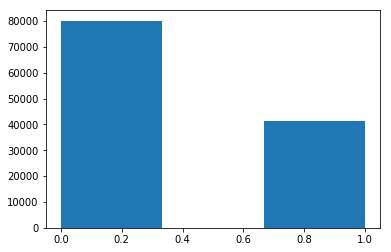

In [165]:
plt.hist(y, bins=3)

We can see that Outs make up 66.6% of the data, but the both classes are important to calculate. We are not modeling a situation where having a false negative is very bad (i.e. fraud detection). Further work would like at choosing different features and comparing it with the results here 